In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
## Q2
cor = 0.15
std_x1 = 1.55
std_x4 = 3.78

cov = cor*std_x1*std_x4
# cor = cov/(std_x1*std_x4)
cov

0.8788499999999999

In [6]:
## Q3
# S: sigma, not squared
S = np.array([30.3832,26.9387,22.773,19.7263,16.0724])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

# plt.figure()
# plt.plot(range(1, len(rho)+1), rho, 'x-')
# plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
# plt.title('Variance explained by principal components')
# plt.xlabel('Principal component')
# plt.ylabel('Variance explained')
# plt.legend(['Individual', 'Cumulative'])
# plt.grid()
# plt.show()

rho:	 [0.32794836 0.25780522 0.18423788 0.13823872 0.09176982]
cumsum:	 [0.32794836 0.58575358 0.76999146 0.90823018 1.        ]


In [141]:
v13 = -0.3413
v25 = -0.6508
# v13 = 0.3425  # not orthogonal
# v25 = -0.6505
V = np.array([[-0.5939,0.2906,v13,0.0621,0.6652],
              [-0.6521,0.0759,0.0004,0.3813,v25],
              [0.2028,-0.5105,-0.7036,0.4508,0.001],
              [-0.3696,-0.5414,-0.1781,-0.7244,-0.1173],
              [-0.2102,-0.5967,0.5973,0.3503,0.3467]])

# check orthogonal
print(V[:,1]@V[:,2])
print(V[:,1]@V[:,4])

0.19876308999999992
5.400000000002625e-05


In [142]:
## Q5
K = 3
density = K/(1.3+2.4+2.7)       # o1
density

0.46875

In [16]:
## Q6
# testset_1 = {3,5,6,7,10}
# testset_2 = {1,2,4,8,9}

# Outerfold 1 : K=1 has lowest error, used for testing
wrong = [7]
error = len(wrong)/5
print(error)

# Outerfold 2 : K=3 has lowest error, used for testing
wrong = [1,2,4]
error = len(wrong)/5
print(error)

0.2
0.6


In [17]:
## Q19, jaccard index
def compute_similarity(Z,Q):
    """
    Input: labels of clusters in set Z and Q, 
    Output: Jaccard index and Rand index.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    Q = list(map(int,Q.split(" ")))
    Z = list(map(int,Z.split(" ")))

    print(f'Q: {Q}')
    print(f'Z: {Z}\n')

    _,n_Q = np.unique(Q, return_counts=True)
    _,n_Z = np.unique(Z, return_counts=True)
    N = len(Q)
    q_clusters = len(n_Q)
    z_clusters = len(n_Z)
    n = np.zeros((z_clusters,q_clusters),dtype='int32')

    for i in range(N):
        Q_idx = Q[i]-1
        Z_idx = Z[i]-1
        if Q[i]==Z[i]: # same cluster
            n[Q_idx,Q_idx] += 1
        else:          # diff cluster
            n[Z_idx,Q_idx] += 1

    S = 0
    for i in range(z_clusters):
        for j in range(q_clusters):
            S += n[i,j]*(n[i,j]-1)/2

    sum_term_z = 0
    for i in range(z_clusters):
        sum_term_z += n_Z[i]*(n_Z[i]-1)/2

    sum_term_q = 0
    for i in range(q_clusters):
        sum_term_q += n_Q[i]*(n_Q[i]-1)/2

    D = N*(N-1)/2 - sum_term_q - sum_term_z + S

    jaccard = S/(0.5*N*(N-1)-D)
    rand = (S+D)/(0.5*N*(N-1))

    print(f'n: \n{n}')
    print(f'n_Q: {n_Q}')
    print(f'n_Z: {n_Z}\n')
    print(f'S: {S}')
    print(f'D: {D}')
    print(f'jaccard similarity: {jaccard:.4f}')
    print(f'rand index: {rand:.4f}')

In [20]:
## Q7
Q = '0 0 0 0 1 0 0 0 0 2'    # dendogram
Z = '0 0 0 0 1 1 1 1 1 1'    # ground truth
compute_similarity(Z,Q)

Q: [0, 0, 0, 0, 1, 0, 0, 0, 0, 2]
Z: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

n: 
[[1 1 4]
 [0 0 4]]
n_Q: [8 1 1]
n_Z: [4 6]

S: 12.0
D: 8.0
jaccard similarity: 0.3243
rand index: 0.4444


In [21]:
## Q8
Q = '1 1 1 1 1 1 1 1 1 1'    # alternative
Z = '0 0 0 0 1 1 1 1 1 1'    # ground truth
compute_similarity(Z,Q)

Q: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Z: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

n: 
[[6]
 [4]]
n_Q: [10]
n_Z: [4 6]

S: 21.0
D: 0.0
jaccard similarity: 0.4667
rand index: 0.4667


In [143]:
## Q9
mu1 = (2+5)/2
mu2 = (8+12+13)/3
print("centroids: ", mu1,mu2)

x = [2,5,8,12,13]
dist = [2-mu1,5-mu1,8-mu2,12-mu2,13-mu2]
total_cost = np.array([i**2 for i in dist]).sum()
total_cost

centroids:  3.5 11.0


18.5

In [33]:
## Q10 unsure
p_machine = 0.18+0.17+0.08+0.1
p_natural = 0.08+0.07+0.16+0.16
print(p_machine,p_natural)

num = (0.08+0.1)
denom = num + (0.16+0.16)
prob = num/denom
prob

0.53 0.4700000000000001


0.36

In [34]:
## Q11
C = 2
M = 6
n_evaluations = C*M
n_evaluations

12

In [35]:
## Q17
M = 8
K1 = 3
K2 = 5
n_models = K1*(K2*M+1)
time = n_models*20
time

2460

In [81]:
## Q19
w0 = 0
w = np.array([0.39,0.77]).reshape(-1,1)
l = 0.25
y_true = np.array([-0.86,-0.61,1.37,0.1]).reshape(-1,1)
x = np.array([-0.5,0.39,1.19,-1.08]).reshape(-1,1)

# Add feature transformation
# sinx = np.sin(x).reshape(-1,1)
# x = np.concatenate((x,sinx),1)
x2 = x**2
x = np.concatenate((x,x2),1)

# Standardize
std = np.std(x, ddof = 1,axis=0)
mu = np.mean(x, axis=0)
x = (x-mu)/std

# Get predictions
y_hat = w0 + x @ w
temp = y_true-y_hat
E = (temp.T@temp).sum() +  l*np.linalg.norm(w, ord=2)**2
E 

[[-0.5012883  -0.77659331]
 [ 0.39100487 -0.9298302 ]
 [ 1.19306614  1.04863184]
 [-1.08278272  0.65779167]]


0.2025476069857263

In [144]:
## Q21
# theta = 0.5,0.7
TP = [125,70]
TN = [95,115]
FN = [20,75]
FP = [40,20]

for i in range(len(TP)):
    TPR = TP[i]/(TP[i]+FN[i])
    FPR = FP[i]/(TN[i]+FP[i])
    print(FPR,TPR)

0.2962962962962963 0.8620689655172413
0.14814814814814814 0.4827586206896552


In [89]:
## Q22
supp_X = 3/5
supp_Y = 8/15
conf_XY = 1/6
print(1/10,4/27,1/6,3/16)

supp_XY = conf_XY*supp_X
conf_YX = supp_XY/supp_Y
conf_YX

0.1 0.14814814814814814 0.16666666666666666 0.1875


0.1875

In [ ]:
## Q23 unsure

In [92]:
## Q24
e = 3/10
a = 0.5*np.log((1-e)/e)
a

0.42364893019360184

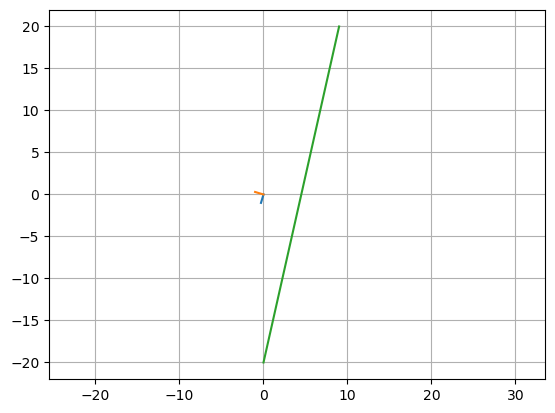

In [113]:
## Q25
v1 = np.array([-.3,-1.0])
v2 = np.array([-1.0,0.3])

v3 = np.array([0.7,0.7])
# np.linalg.norm(v3, ord=2)**2

plt.plot([0,-0.3],[0,-1])
plt.plot([0,-1],[0,0.3])
plt.plot(np.linspace(-20,20,10))
plt.axis('equal')
plt.grid()
plt.show()

In [145]:
## Q26
1+6+5+4

16

In [140]:
## Q27
x = [-0.82,0,2.5]
N = len(x)
l = [0.15,0.21,0.49,1.15]

L_lambda = []
for k in range(len(l)):  # for each lambda value
    print(f'\nlambda: {l[k]}')
    Li_values = []
    for i in range(N):  # for each x value
        kde = 0
        for j in range(N): # find i!=j, add the KDE
            if j!=i:
                kde += norm.pdf(x[i], x[j], l[k])
        temp = 1/(N-1)*(kde)
        Li = np.log(temp)
        Li_values.append(Li)
    print(Li_values)


lambda: 0.15
[-14.657187951100958, -14.657187951100958, -138.60385461776764]

lambda: 0.21
[-7.675020731939858, -7.675020731939858, -70.9131159700351]

lambda: 0.49
[-2.298985721327932, -2.298976693629939, -13.914097786306913]

lambda: 1.15
[-1.9862805290540033, -1.891492728304507, -3.9624292572123108]
